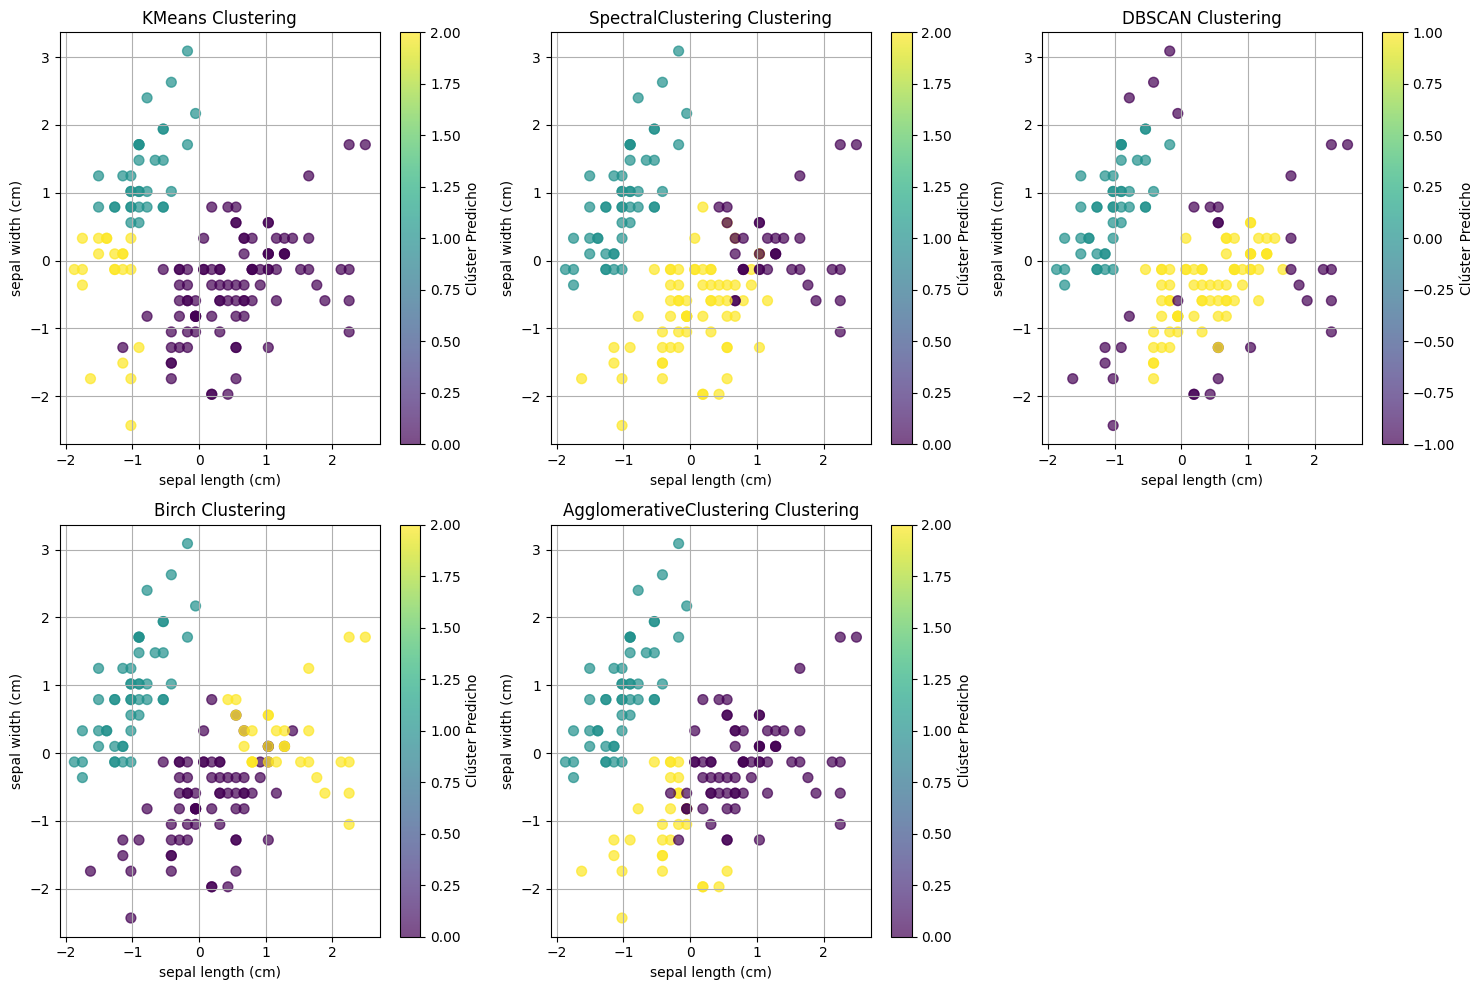

In [4]:
# Lista de modelos de agrupación
clustering_models = {
    'KMeans': KMeans(n_clusters=3, random_state=42, n_init='auto'),
    'SpectralClustering': SpectralClustering(n_clusters=3, random_state=42, affinity='nearest_neighbors'),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5), # Ajustar eps y min_samples según el dataset escalado
    'Birch': Birch(n_clusters=3),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3)
}

plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(clustering_models.items()):
    if name == 'DBSCAN':
        # DBSCAN no requiere n_clusters, puede encontrar un número variable de clústeres
        clusters = model.fit_predict(X_scaled)
    else:
        clusters = model.fit_predict(X_scaled)

    plt.subplot(2, 3, i + 1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
    plt.title(f'{name} Clustering')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.colorbar(label='Clúster Predicho')
    plt.grid(True)

plt.tight_layout()
plt.show()

--- ENTRENANDO MODELOS Y CALCULANDO MÉTRICAS ---
Métricas para KMeans calculadas.
Métricas para SpectralClustering calculadas.
Métricas para DBSCAN calculadas.
Métricas para Birch calculadas.
Métricas para AgglomerativeClustering calculadas.




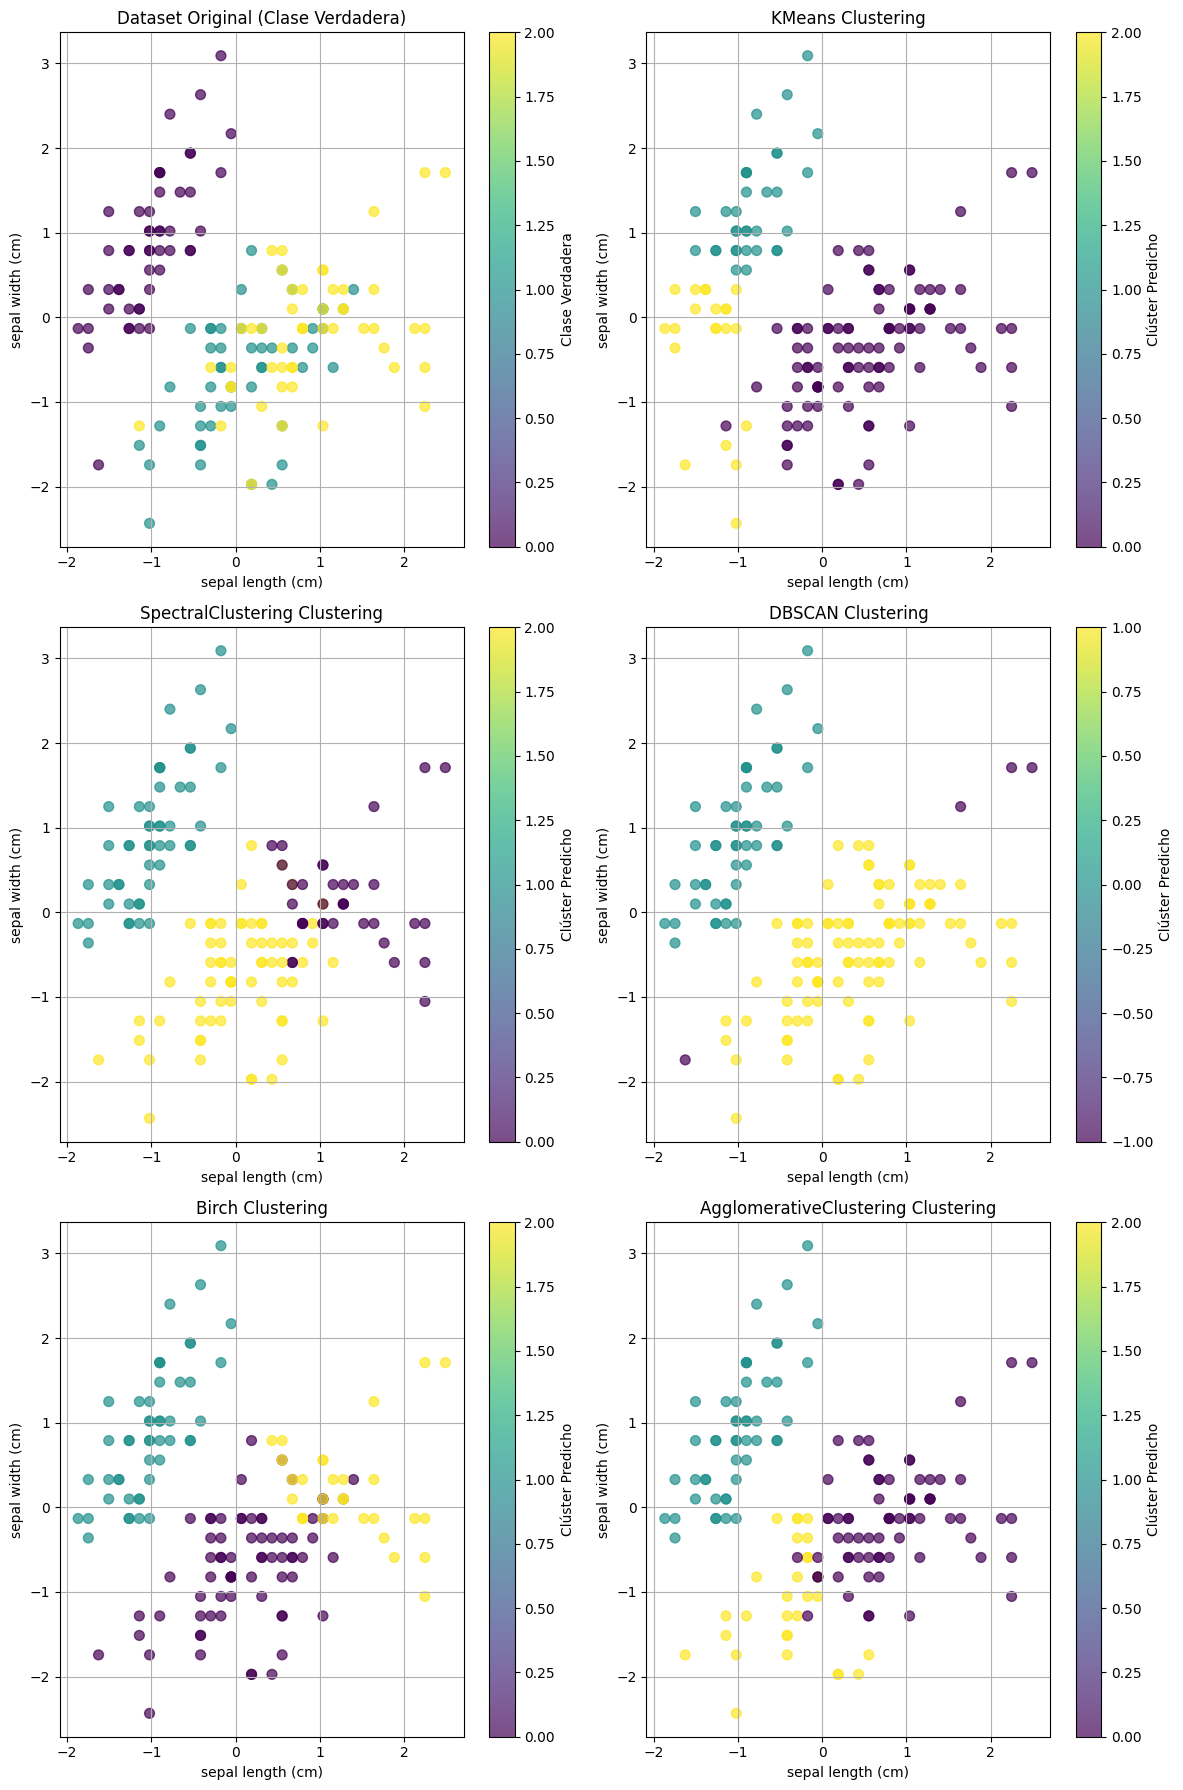


--- RESUMEN DE MÉTRICAS DE CLUSTERING ---

## KMeans:
  - Índice Rand Ajustado (ARI)    : 0.4328
  - Info Mutua Normalizada (NMI)  : 0.5896
  - Homogeneidad                  : 0.5347
  - Completitud                   : 0.6570
  - V-measure                     : 0.5896
  - Coeficiente de Silueta        : 0.4799
  - Índice Davies-Bouldin         : 0.7894
-----------------------------------
## SpectralClustering:
  - Índice Rand Ajustado (ARI)    : 0.6465
  - Info Mutua Normalizada (NMI)  : 0.6838
  - Homogeneidad                  : 0.6737
  - Completitud                   : 0.6941
  - V-measure                     : 0.6838
  - Coeficiente de Silueta        : 0.4593
  - Índice Davies-Bouldin         : 0.8224
-----------------------------------
## DBSCAN:
  - Índice Rand Ajustado (ARI)    : 0.5518
  - Info Mutua Normalizada (NMI)  : 0.6900
  - Homogeneidad                  : 0.5786
  - Completitud                   : 0.8544
  - V-measure                     : 0.6900
  - Coeficiente de Sil

In [2]:
# 1. IMPORTACIÓN DE BIBLIOTECAS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import (
    AgglomerativeClustering,
    Birch,
    DBSCAN,
    KMeans,
    SpectralClustering,
)
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# --- Importación de métricas ---
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score,
)

# --- Carga y escalado de datos (sin cambios) ---
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Lista de modelos (sin cambios) ---
clustering_models = {
    'KMeans': KMeans(n_clusters=3, random_state=42, n_init='auto'),
    'SpectralClustering': SpectralClustering(n_clusters=3, random_state=42, affinity='nearest_neighbors'),
    'DBSCAN': DBSCAN(eps=0.8, min_samples=5), # Ajustado eps para un mejor resultado en Iris
    'Birch': Birch(n_clusters=3),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3)
}


# --- Diccionario para almacenar clusters y métricas ---
all_clusters = {}
all_metrics = {}


# --- Bucle para entrenar modelos y calcular métricas ---
print("--- ENTRENANDO MODELOS Y CALCULANDO MÉTRICAS ---")
for name, model in clustering_models.items():
    # Entrenar y predecir
    clusters = model.fit_predict(X_scaled)
    all_clusters[name] = clusters

    # Calcular métricas
    metrics = {}

    # Métricas externas (comparan con 'y' verdadero)
    metrics['Índice Rand Ajustado (ARI)'] = adjusted_rand_score(y, clusters)
    metrics['Info Mutua Normalizada (NMI)'] = normalized_mutual_info_score(y, clusters)
    metrics['Homogeneidad'] = homogeneity_score(y, clusters)
    metrics['Completitud'] = completeness_score(y, clusters)
    metrics['V-measure'] = v_measure_score(y, clusters)

    # Métricas internas (evalúan la estructura del clúster)
    # Solo se pueden calcular si hay más de 1 clúster
    unique_labels = len(set(clusters))
    if unique_labels > 1:
        metrics['Coeficiente de Silueta'] = silhouette_score(X_scaled, clusters)
        metrics['Índice Davies-Bouldin'] = davies_bouldin_score(X_scaled, clusters)
    else:
        metrics['Coeficiente de Silueta'] = 'N/A'
        metrics['Índice Davies-Bouldin'] = 'N/A'

    # Para DBSCAN, es útil saber cuántos clústeres encontró y cuánto ruido
    if name == 'DBSCAN':
        n_clusters = len(set(c for c in clusters if c != -1))
        n_noise = list(clusters).count(-1)
        metrics['Clústeres Encontrados'] = n_clusters
        metrics['Puntos de Ruido'] = n_noise

    all_metrics[name] = metrics
    print(f"Métricas para {name} calculadas.")
print("\n" + "="*50 + "\n")


# --- Bloque de visualización ---
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
axes = axes.flatten()

# Gráfica 1: Datos Originales como referencia
scatter_original = axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
axes[0].set_title('Dataset Original (Clase Verdadera)')
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])
fig.colorbar(scatter_original, ax=axes[0], label='Clase Verdadera')
axes[0].grid(True)


# Iteramos sobre los modelos de clustering para graficar
for i, name in enumerate(clustering_models.keys()):
    ax = axes[i + 1]
    clusters = all_clusters[name]

    scatter_model = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
    ax.set_title(f'{name} Clustering')
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    fig.colorbar(scatter_model, ax=ax, label='Clúster Predicho')
    ax.grid(True)

plt.tight_layout()
plt.show()


# --- Bloque para MOSTRAR las métricas ---
print("\n" + "="*50)
print("--- RESUMEN DE MÉTRICAS DE CLUSTERING ---")
print("="*50 + "\n")

for name, metrics in all_metrics.items():
    print(f"## {name}:")
    for metric_name, value in metrics.items():
        if isinstance(value, (int, float)):
            print(f"  - {metric_name:<30}: {value:.4f}")
        else:
            print(f"  - {metric_name:<30}: {value}")
    print("-" * 35)